In [82]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random, re

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

In [84]:
labels_path = 'test_files/s_exp_test.csv'
features_path = 'test_files/s_exp_features_test.csv'

In [85]:
s_exp_features = pd.read_csv(features_path, index_col = 0)
s_exp_features.columns = ["Number of Notes", "Location of First Note", "Total Duration of Rests", "Average Max Slope", "Order of Contour", "Consonance"]
s_exp_features.head()

,Number of Notes,Location of First Note,Total Duration of Rests,Average Max Slope,Order of Contour,Consonance
0,2.0,0.125000,0.584635,4.0,0.0,0.0415
1,1.0,0.678385,-0.678385,0.0,0.0,0.4068
2,5.0,0.036458,-11.315104,1.5,1.0,1.5536
3,1.0,0.003906,-2.003906,0.0,0.0,0.0004
4,7.0,0.170573,-31.157552,4.0,2.0,1.5620


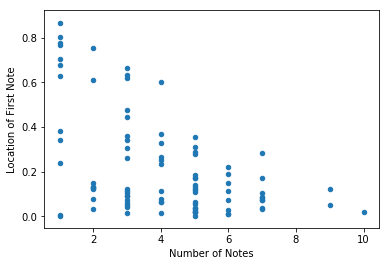

In [86]:
s_exp_features.plot.scatter("Number of Notes", "Location of First Note")

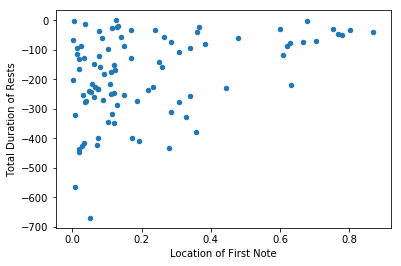

In [87]:
s_exp_features.plot.scatter("Location of First Note", "Total Duration of Rests")

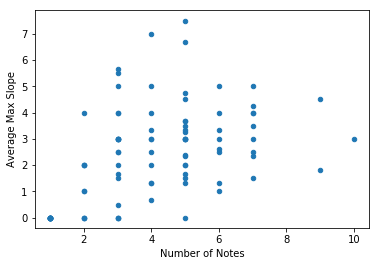

In [92]:
s_exp_features.plot.scatter("Number of Notes", "Average Max Slope")

# Webster Night

In [112]:
_input_path = "midi_to_csv/WebsterNight_chords.csv"
_output_path = "generated_solos/12_bar_simple.csv"

In [113]:
_input = pd.read_csv(_input_path).drop("chord",1).drop("velocity",1)
_input.head()

,Unnamed: 0,note_name,start_time,duration
0,0,F4,0.125000,0.154948
1,1,A4,0.290365,0.725260
2,2,B4,1.678385,0.339844
3,3,C#5,2.036458,0.174479
4,4,B4,2.255208,0.164062


In [115]:
_output = pd.read_csv(_output_path)
_output.head()

,Unnamed: 0,note_name,start_time,duration
0,0,Bb4,0.120,0.067
1,1,Db5,0.197,0.048
2,2,Bb4,0.255,0.051
3,3,F4,0.341,0.124
4,4,B3,0.543,0.203


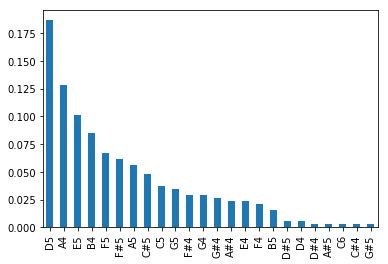

In [109]:
_input_note_name_prop = _input["note_name"].value_counts()/sum(_input["note_name"].value_counts())
_input_note_name_prop.plot.bar()

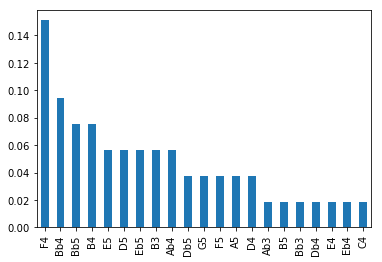

In [110]:
_output_note_name_prop = _output["note_name"].value_counts()/sum(_output["note_name"].value_counts())
_output_note_name_prop.plot.bar()

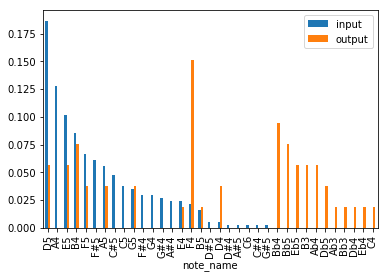

In [111]:
_input_prop_df = pd.DataFrame(_input_note_name_prop).reset_index()
_output_prop_df = pd.DataFrame(_output_note_name_prop).reset_index()
joined_note_name = _input_prop_df.merge(_output_prop_df, on = "index", how = "outer").fillna(0)
joined_note_name.columns = ["note_name", "input","output"]
joined_note_name.plot.bar(x = "note_name")